АППРОКСИМАЦИЯ ТРИГОНОМЕТРИЧЕСКИМИ ФУНКЦИЯМИ. РЯДЫ ФУРЬЕ

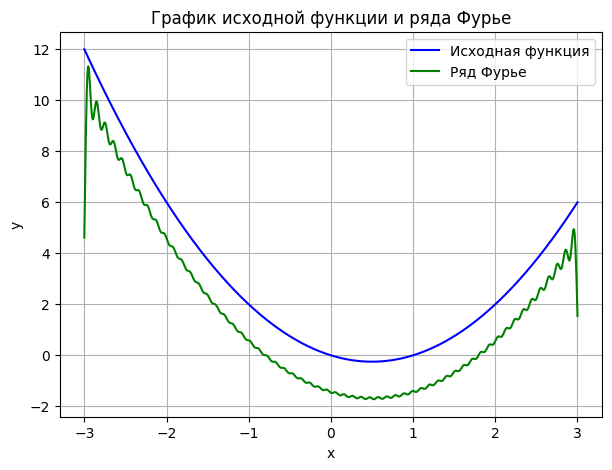

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Функция для численного интегрирования
def IntMonte_Karlo(function, a, b, T):
    integral = 0
    delta_t = 0.001  
    t = a 
    while t < b:
        integral += function(t) * delta_t 
        t += delta_t
    return integral

# Функция для вычисления коэффициентов ряда Фурье
# f - функция, n - кол-во членов, T - период колебания, a|b - интервал интегрирования
def fourier_coefficients(f, n, T, a, b):
    a0 = (1 / T) * IntMonte_Karlo(f, a, b, T)
    an = [(2 / T) * IntMonte_Karlo(lambda t: f(t) * math.cos(2 * math.pi * k * t / T), a, b, T) for k in range(1, n + 1)]
    bn = [(2 / T) * IntMonte_Karlo(lambda t: f(t) * math.sin(2 * math.pi * k * t / T), a, b, T) for k in range(1, n + 1)]
    return a0, an, bn

# Исходная функция
def f(x):
    return x**2 - x

# Вычисление коэффициентов ряда Фурье для исходной функции
a = -3 # начальная точка
T = 2 * np.pi
b = 3 # конечная точка
num_terms = 60 # Количество членов ряда Фурье для вычисления
a0, an, bn = fourier_coefficients(f, num_terms, T, a, b)

# Создание массива со значениями x на интервале от а до б с 1000 равномерно распределенными точками
x_values = np.linspace(a, b, 1000)

# Вычисление значений ряда Фурье в каждой точке x
fourier_series_values = [sum(an[k-1] * np.cos(2 * np.pi * k * t / T) + bn[k-1] * np.sin(2 * np.pi * k * t / T) for k in range(1, num_terms + 1)) + a0 / 2 for t in x_values]

# Построение графика
plt.figure(figsize=(7, 5))
plt.plot(x_values, f(x_values), label='Исходная функция', color='blue')
plt.plot(x_values, fourier_series_values, label='Ряд Фурье', color='green')
plt.title('График исходной функции и ряда Фурье')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

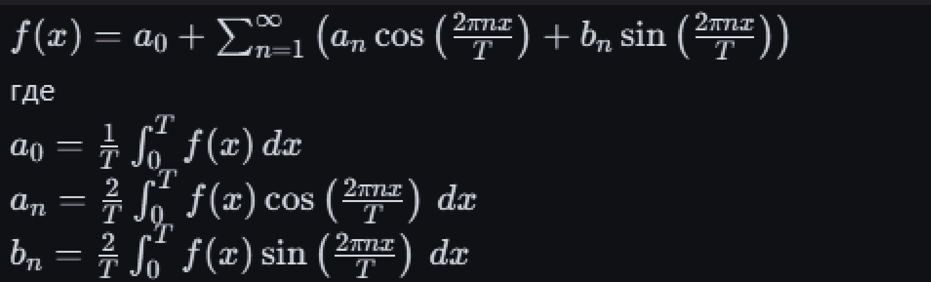
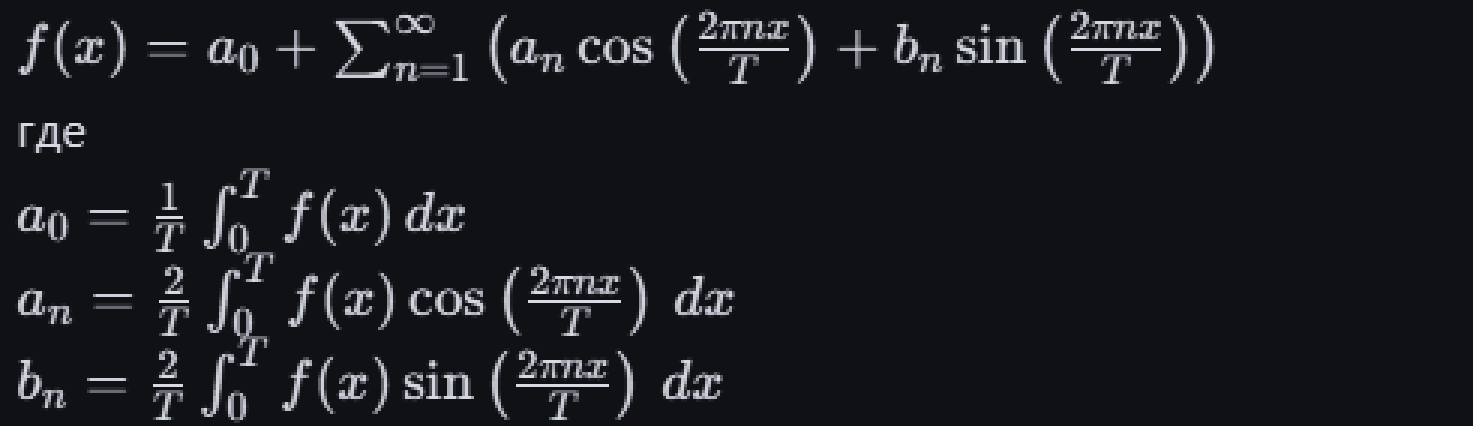

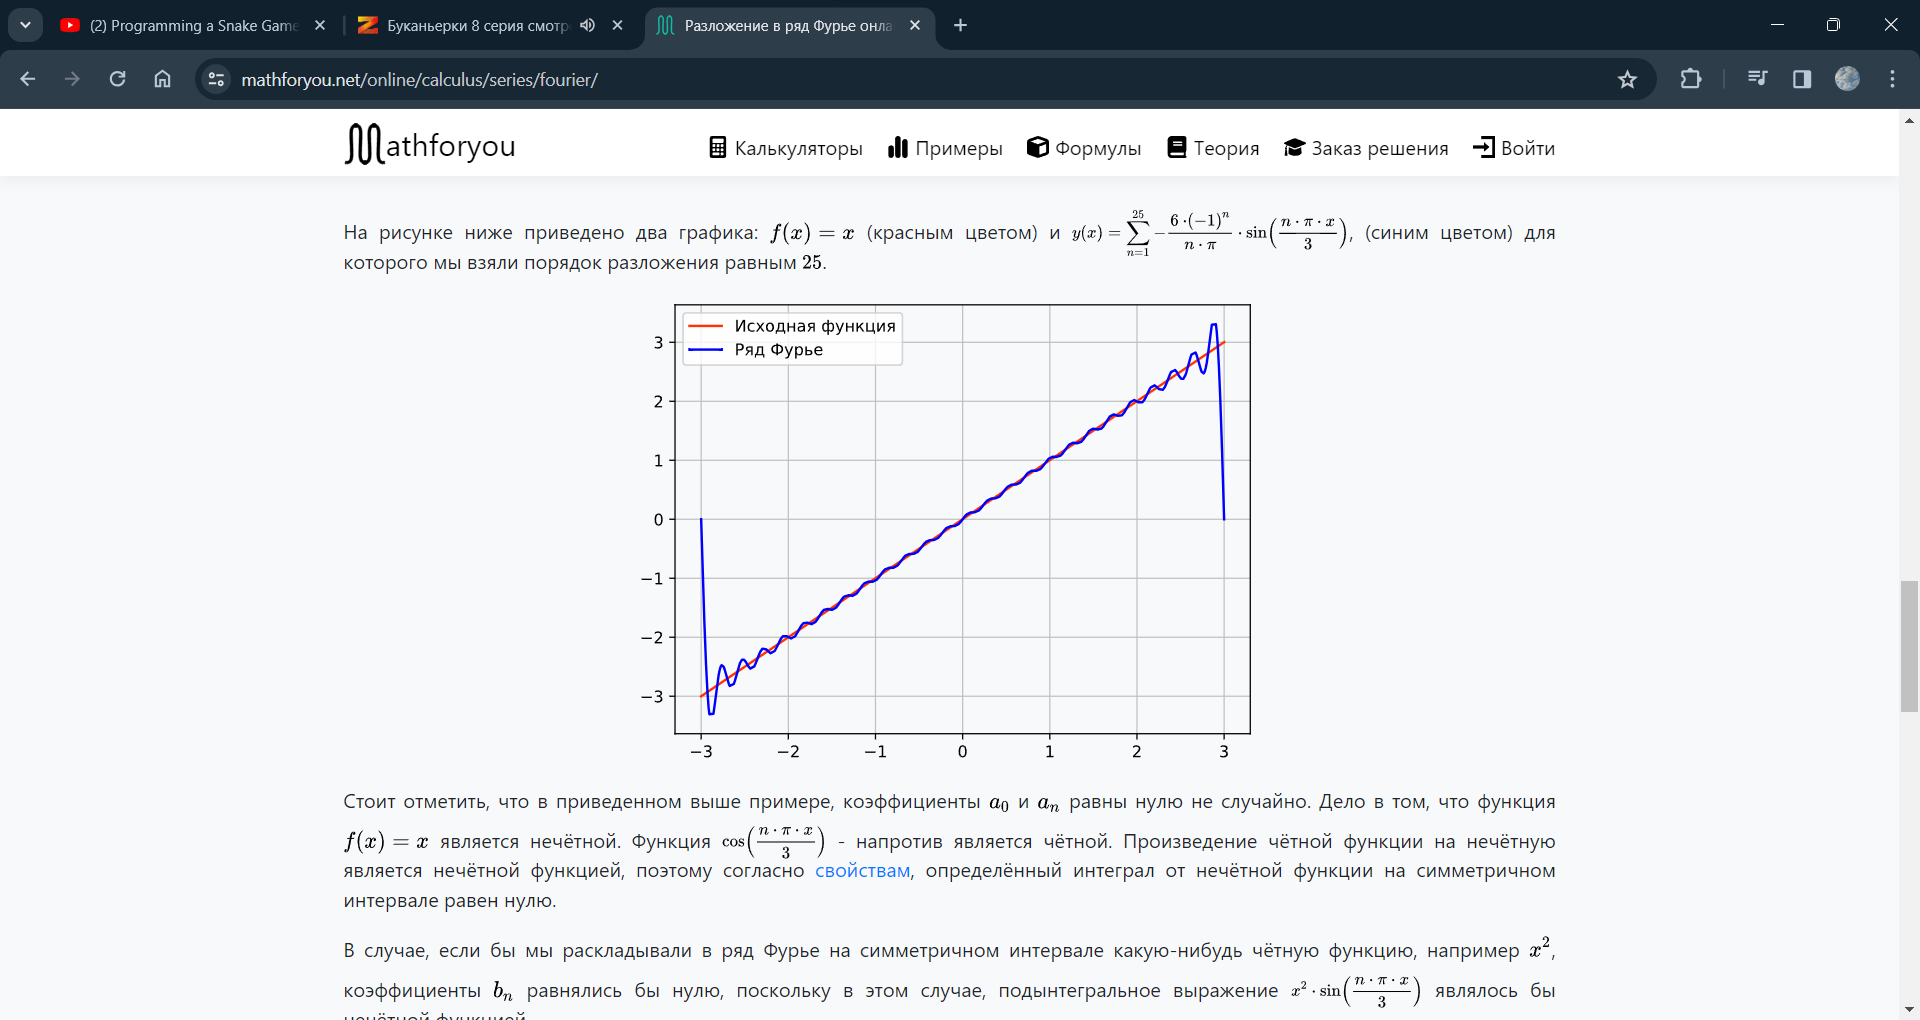

In [22]:
# print(f"a0 = {a0}")
# for k in range(1, num_terms + 1):
#     print(f"an_{k} = {an[k-1]}, bn_{k} = {bn[k-1]}")